# Mancino Market Dataset

This notebook provides a quick tour of the **Mancino Market** synthetic dataset using a remote data source by default.

It will:
- Load the CSVs from a **GitHub raw** URL (you can change the repo/branch/path in the config cell).
- Show a **formatted sneak peek** of each table.
- Explore **sales by store** (overview and daily trends).
- Plot **customer geography on an interactive map**.


## Loading the necessary libraries and importing the files.

**Setting the directories, if you have forked the Github repository, or prefer to work with a different version, then please change the REMOTE_RAW_BASE directory accordingly **

In [1]:

# --- Remote data config (edit these values if using a fork/different branch/path) ---
REMOTE_RAW_BASE = "https://raw.githubusercontent.com/jrmst102/mancino/main/data/v1_2025-08-24"

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely import wkt

def _join_remote(name: str) -> str:
    base = REMOTE_RAW_BASE.rstrip("/")
    return f"{base}/{name}"

def load_csv(name: str) -> pd.DataFrame:
    url = _join_remote(name)
    print(f"Loading: {url}")
    return pd.read_csv(url)


In [2]:

pd.set_option("display.max_colwidth", 120)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")


## Loading the actual files

In [3]:

stores         = load_csv("stores.csv")
products       = load_csv("products.csv")
inventory      = load_csv("product_store_inventory.csv")
customers      = load_csv("customers.csv")
transactions   = load_csv("transactions.csv")
items          = load_csv("transaction_items.csv")

counts = pd.DataFrame({
    "table": ["stores","products","product_store_inventory","customers","transactions","transaction_items"],
    "rows":  [len(stores), len(products), len(inventory), len(customers), len(transactions), len(items)]
})
counts


Loading: https://raw.githubusercontent.com/jrmst102/mancino/main/data/v1_2025-08-24/stores.csv
Loading: https://raw.githubusercontent.com/jrmst102/mancino/main/data/v1_2025-08-24/products.csv
Loading: https://raw.githubusercontent.com/jrmst102/mancino/main/data/v1_2025-08-24/product_store_inventory.csv
Loading: https://raw.githubusercontent.com/jrmst102/mancino/main/data/v1_2025-08-24/customers.csv
Loading: https://raw.githubusercontent.com/jrmst102/mancino/main/data/v1_2025-08-24/transactions.csv
Loading: https://raw.githubusercontent.com/jrmst102/mancino/main/data/v1_2025-08-24/transaction_items.csv


,table,rows
0,stores,5
1,products,2000
2,product_store_inventory,7970
3,customers,5000
4,transactions,35460
5,transaction_items,169618


# *Visualizing the Tables*

*Sneak Peek of the Stores*

In [4]:
display(stores)

,store_id,store_code,name,neighborhood,borough,address,city,state,zip,latitude,longitude,opened_date,store_type,sqft
0,S0001,MIDTOWN,Mancino Market – Midtown,Midtown,Manhattan,1350 6th Ave,New York,NY,10019,40.76,-73.98,2024-06-01,Grocery – Urban Medium,14000
1,S0002,NOHO,Mancino Market – NoHo,NoHo,Manhattan,682 Broadway,New York,NY,10012,40.73,-73.99,2024-06-01,Grocery – Urban Medium,12000
2,S0003,CHELSEA,Mancino Market – Chelsea,Chelsea,Manhattan,220 W 23rd St,New York,NY,10011,40.74,-74.00,2024-06-01,Grocery – Urban Medium,14000
3,S0004,GV,Mancino Market – Greenwich Village,Greenwich Village,Manhattan,175 Bleecker St,New York,NY,10012,40.73,-74.00,2024-06-01,Grocery – Urban Medium,15000
4,S0005,NOLITA,Mancino Market – Nolita,Nolita,Manhattan,235 Mulberry St,New York,NY,10012,40.72,-74.00,2024-06-01,Grocery – Urban Medium,14000


In [5]:
display(customers)

,customer_id,first_name,last_name,email,phone,address,city,state,zip,latitude,longitude,birth_date,gender,loyalty_tier,signup_date,marketing_opt_in,home_store_id
0,C000001,Logan,Patel,logan.patel1@example.com,(448) 218-1355,315 6th Ave,New York,NY,10019,40.76,-73.99,1981-08-29,NaN,NaN,2024-07-09,True,S0001
1,C000002,Rowan,Kim,rowan.kim2@example.com,(839) 816-4180,351 W 56th St,New York,NY,10019,40.77,-73.98,1950-06-19,NaN,NaN,2024-06-15,False,S0001
2,C000003,Alex,Kim,alex.kim3@example.com,(324) 227-2273,444 W 53rd St,New York,NY,10020,40.77,-73.98,2001-10-30,NaN,Gold,2024-05-30,False,S0001
3,C000004,Sam,Lopez,sam.lopez4@example.com,(708) 443-1181,674 W 57th St,New York,NY,10119,40.76,-73.99,1960-09-11,NaN,NaN,2023-12-30,False,S0001
4,C000005,Riley,Garcia,riley.garcia5@example.com,(578) 394-6750,828 W 55th St,New York,NY,10119,40.76,-73.99,1997-04-02,NaN,NaN,2023-10-12,False,S0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,C004996,Parker,Davis,parker.davis4996@example.com,(307) 401-3459,466 Kenmare St,New York,NY,10012,40.72,-73.99,1981-08-01,NaN,NaN,2024-07-08,True,S0005
4996,C004997,Alex,Perez,alex.perez4997@example.com,(645) 272-9065,639 Prince St,New York,NY,10012,40.72,-74.00,2005-02-04,NaN,Silver,2024-07-02,False,S0005
4997,C004998,Logan,Clark,logan.clark4998@example.com,(901) 308-9753,699 Prince St,New York,NY,10012,40.72,-73.99,1965-08-17,NaN,Gold,2023-08-04,True,S0005
4998,C004999,Elliot,Perez,elliot.perez4999@example.com,(567) 858-3484,769 Mulberry St,New York,NY,10012,40.73,-73.99,1981-05-10,NaN,Silver,2024-01-28,False,S0005


In [6]:

transactions['txn_ts'] = pd.to_datetime(transactions['txn_ts'])
transactions['date'] = transactions['txn_ts'].dt.date


**Calculating the Sales by store (total revenue) **

In [7]:
# Using transaction header totals
store_sales = (transactions.groupby("store_id", as_index=False)["total_cents"]
                            .sum()
                            .rename(columns={"total_cents":"total_cents_sum"}))
store_sales["total_usd"] = (store_sales["total_cents_sum"] / 100.0).round(2)
store_sales = store_sales.sort_values("total_usd", ascending=False).reset_index(drop=True)
store_sales


,store_id,total_cents_sum,total_usd
0,S0005,56699270,"566,992.70"
1,S0002,56301388,"563,013.88"
2,S0003,56137762,"561,377.62"
3,S0004,56055134,"560,551.34"
4,S0001,55730839,"557,308.39"


**Displaying the stores with the actual store name, rather than the store_id**

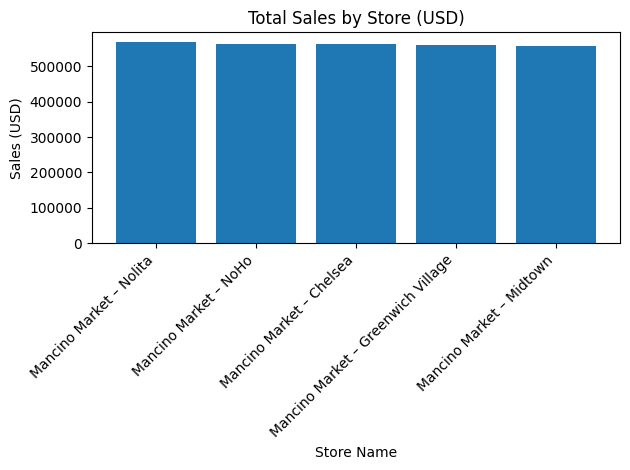

In [8]:
store_sales_with_names = pd.merge(store_sales, stores[["store_id", "name"]], on="store_id")

plt.figure()
plt.bar(store_sales_with_names["name"], store_sales_with_names["total_usd"])
plt.title("Total Sales by Store (USD)")
plt.xlabel("Store Name")
plt.ylabel("Sales (USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

** Display the Daily sales by store (trend) **

In [9]:
# Calculate daily sales by store
daily_store_sales = transactions.groupby(["date", "store_id"])["total_cents"].sum().reset_index()
daily_store_sales["total_usd"] = (daily_store_sales["total_cents"] / 100.0).round(2)

# Pivot the table to have dates as index and stores as columns
pivot_daily = daily_store_sales.pivot(index="date", columns="store_id", values="total_usd")

# Fill any missing values with 0 (in case a store had no sales on a given day)
pivot_daily = pivot_daily.fillna(0)

display(pivot_daily.head())

store_id,S0001,S0002,S0003,S0004,S0005
date,,,,,
2025-07-01,"9,275.98","8,780.47","9,582.93","8,807.72","10,001.26"
2025-07-02,"9,723.70","10,480.46","9,146.03","10,367.32","8,694.29"
2025-07-03,"10,198.14","10,923.29","9,726.54","9,436.59","8,582.86"
2025-07-04,"10,570.36","10,501.37","10,695.56","11,045.87","10,939.30"
2025-07-05,"12,117.20","12,526.91","11,876.38","11,845.67","12,604.84"


**Displaying the sales by categories **

In [10]:
# Join transaction items with product information
items_with_category = pd.merge(items, products[['product_id', 'category']], on='product_id')

# Calculate sales by category (using extended_price_cents from items)
category_sales = (items_with_category.groupby('category', as_index=False)['extended_price_cents']
                                     .sum()
                                     .rename(columns={'extended_price_cents': 'total_cents_sum'}))

# Convert to USD
category_sales['total_usd'] = (category_sales['total_cents_sum'] / 100.0).round(2)

# Sort and get the top 10
top_10_categories = category_sales.sort_values('total_usd', ascending=False).head(10).reset_index(drop=True)

display(top_10_categories)

,category,total_cents_sum,total_usd
0,Alcohol,58544448,"585,444.48"
1,Pet Food,47966653,"479,666.53"
2,Meat and Seafood,37933118,"379,331.18"
3,Beverages,17441548,"174,415.48"
4,Dairy & Eggs,14883581,"148,835.81"
5,Prepared Meals,14448358,"144,483.58"
6,Frozen Foods,12980698,"129,806.98"
7,Deli,11530690,"115,306.90"
8,Breakfast & Cereal,8500899,"85,008.99"
9,Condiments/Sauces/Spices,8176691,"81,766.91"


** Calculating the total spending by customer **

In [11]:
# Calculate total spending per customer
customer_spending = transactions.groupby('customer_id', as_index=False)['total_cents'].sum()

# Convert to USD
customer_spending['total_usd'] = (customer_spending['total_cents'] / 100.0).round(2)

# Sort and get the top 5 customers
top_5_customers = customer_spending.sort_values('total_usd', ascending=False).head(5).reset_index(drop=True)

# Merge with the customers DataFrame to get demographic and location information
top_5_customers_info = pd.merge(top_5_customers, customers, on='customer_id')

display(top_5_customers_info)

,customer_id,total_cents,total_usd,first_name,last_name,email,phone,address,city,state,zip,latitude,longitude,birth_date,gender,loyalty_tier,signup_date,marketing_opt_in,home_store_id
0,C004021,165868,"1,658.68",Logan,Lopez,logan.lopez4021@example.com,(821) 536-9714,237 Kenmare St,New York,NY,10012,40.72,-74.00,1951-06-18,NaN,Silver,2024-03-10,True,S0005
1,C004613,161764,"1,617.64",Skyler,Davis,skyler.davis4613@example.com,(401) 731-9475,885 Mott St,New York,NY,10012,40.72,-73.99,1955-02-11,NaN,NaN,2024-04-11,True,S0005
2,C004347,152000,"1,520.00",Avery,Brown,avery.brown4347@example.com,(262) 460-5529,855 Elizabeth St,New York,NY,10012,40.72,-74.00,1992-03-08,NaN,NaN,2023-07-16,True,S0005
3,C001501,139603,"1,396.03",Logan,Martinez,logan.martinez1501@example.com,(678) 215-2320,149 Lafayette St,New York,NY,10003,40.73,-73.99,1989-12-03,NaN,Silver,2023-10-09,True,S0002
4,C002857,138002,"1,380.02",Riley,Wang,riley.wang2857@example.com,(523) 902-9015,156 9th Ave,New York,NY,10001,40.74,-74.00,1993-06-08,NaN,NaN,2023-11-19,True,S0003


**Displaying a customer map**

In [26]:
import pandas as pd
import plotly.express as px

# Ensure numeric + correct column names
if "latitude" not in customers.columns or "longitude" not in customers.columns:
    # try common alternatives
    rename_map = {}
    for c in customers.columns:
        lc = c.lower()
        if lc in {"lat"} and "latitude" not in customers.columns:
            rename_map[c] = "latitude"
        if lc in {"lon", "lng", "long"} and "longitude" not in customers.columns:
            rename_map[c] = "longitude"
    customers = customers.rename(columns=rename_map)

customers["latitude"] = pd.to_numeric(customers["latitude"], errors="coerce")
customers["longitude"] = pd.to_numeric(customers["longitude"], errors="coerce")

# Filter valid NYC-ish bounds to avoid outliers
valid = customers[
    customers["latitude"].between(30.0, 45.0) &
    customers["longitude"].between(-80.0, -69.0)
].dropna(subset=["latitude", "longitude"])

hover = None
for cand in ["customer_name","name","full_name","customer_id","email"]:
    if cand in valid.columns:
        hover = cand
        break

fig = px.scatter_mapbox(
    valid,
    lat="latitude",
    lon="longitude",
    hover_name=hover,
    zoom=12,
    height=700,
    mapbox_style="open-street-map"
)
fig.show()
